### Explore and Clean Data for Repeat Animals

___  
Over this section the data will be explored:  

* Data Familiarization - Check feature names, size, and shape
* Summary Statistics - Review and check for relationships if any
* Feature Exploration - Examine individual features and aggregations
* Create Visuals - Summary findings with visuals
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/austin-data.csv')
df.head()

,animal_id,outcome_time,date_of_birth,outcome_type,outcome_gender,outcome_age,intake_time,found_location,intake_type,intake_condition,animal_type,intake_gender,intake_age,breed,color,stay,repeat,animal_stay,stay_duration,spay_neuter
0,A912799,2024-10-17 13:07:00,2024-07-21,Adoption,Spayed Female,2.0,2024-09-05 14:57:00,7201 Levander Loop in Austin (TX),Abandoned,Normal,Cat,Intact Female,1.0,Domestic Shorthair,Brown Tabby,1,0,A912799-1,41,1
1,A912055,2024-10-17 12:25:00,2023-10-25,Adoption,Neutered Male,11.0,2024-08-25 08:20:00,1800 Fairlawn Lane in Austin (TX),Stray,Injured,Cat,Intact Male,10.0,Domestic Shorthair,Brown Tabby/White,1,0,A912055-1,53,1
2,A915002,2024-10-17 12:21:00,2023-10-10,Return to Owner,Intact Male,12.0,2024-10-10 12:10:00,Austin (TX),Public Assist,Normal,Dog,Intact Male,12.0,German Shepherd Mix,Tan,1,0,A915002-1,7,0
3,A912548,2024-10-17 11:45:00,2021-09-02,Adoption,Neutered Male,36.0,2024-09-02 22:31:00,6900 Bryn Mawr in Austin (TX),Stray,Normal,Dog,Intact Male,36.0,Siberian Husky Mix,Black/White,1,0,A912548-1,44,1
4,A915279,2024-10-17 00:00:00,2022-10-14,Transfer,Intact Female,24.0,2024-10-14 11:47:00,14514 Highsmith Street in Austin (TX),Stray,Normal,Cat,Intact Female,24.0,Domestic Shorthair,Black,1,0,A915279-1,2,0


In [3]:
# Converting dates to datetime dtype
df['outcome_time'] = pd.to_datetime(df['outcome_time'])
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['intake_time'] = pd.to_datetime(df['intake_time'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156664 entries, 0 to 156663
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   animal_id         156664 non-null  object        
 1   outcome_time      156664 non-null  datetime64[ns]
 2   date_of_birth     156664 non-null  datetime64[ns]
 3   outcome_type      156664 non-null  object        
 4   outcome_gender    156664 non-null  object        
 5   outcome_age       156664 non-null  float64       
 6   intake_time       156664 non-null  datetime64[ns]
 7   found_location    156664 non-null  object        
 8   intake_type       156664 non-null  object        
 9   intake_condition  156664 non-null  object        
 10  animal_type       156664 non-null  object        
 11  intake_gender     156664 non-null  object        
 12  intake_age        156664 non-null  float64       
 13  breed             156664 non-null  object        
 14  colo

In [5]:
df.describe()

,outcome_time,date_of_birth,outcome_age,intake_time,intake_age,stay,repeat,stay_duration,spay_neuter
count,156664,156664,156664.000000,156664,156664.000000,156664.000000,156664.000000,156664.000000,156664.000000
mean,2018-09-22 04:42:14.499055360,2016-08-08 03:47:56.065975296,24.166488,2018-09-02 09:39:12.263570176,23.657581,1.147781,0.189010,19.400698,0.431069
min,2013-10-01 10:39:00,1992-06-25 00:00:00,0.000000,2013-10-01 07:51:00,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2016-01-19 16:57:00,2014-02-17 00:00:00,2.000000,2016-01-03 16:21:00,1.150000,1.000000,0.000000,2.000000,0.000000
50%,2018-06-24 19:11:00,2016-09-09 00:00:00,12.000000,2018-06-05 11:17:00,12.000000,1.000000,0.000000,6.000000,0.000000
75%,2021-05-14 14:52:15,2019-08-22 00:00:00,24.000000,2021-04-23 16:13:00,24.000000,1.000000,0.000000,20.000000,1.000000
max,2024-10-17 13:07:00,2024-10-07 00:00:00,288.000000,2024-10-16 14:50:00,288.000000,33.000000,1.000000,365.000000,1.000000
std,NaN,NaN,34.309692,NaN,34.255870,0.566218,0.391517,35.894930,0.495227


In [6]:
# count how many cats and dogs taken in
year_outcomes = df['animal_id'].groupby(df['outcome_time'].dt.year).count()
year_outcomes

outcome_time
2013     3438
2014    17379
2015    17568
2016    16513
2017    16454
2018    15737
2019    18794
2020     8974
2021    11172
2022    11114
2023    10524
2024     8997
Name: animal_id, dtype: int64

In [7]:
# count how many cats and dogs successfully rehomed

success = df[(df['outcome_type'] == 'Adoption') | (df['outcome_type'] == 'Return to Owner') | (df['outcome_type'] == 'Rto-Adopt')]
year_success = success['animal_id'].groupby(df['outcome_time'].dt.year).count()
year_success

outcome_time
2013     2003
2014    10245
2015    10810
2016    11181
2017    11254
2018    10877
2019    12368
2020     6181
2021     8023
2022     7812
2023     7389
2024     6486
Name: animal_id, dtype: int64

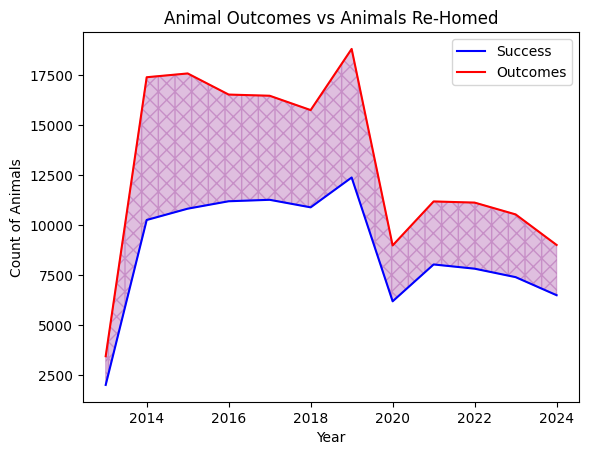

In [8]:
# visualize success vs failures
fig, ax = plt.subplots()
ax.plot(year_success.index, year_success.values, color='blue', label='Success')
ax.plot(year_outcomes.index, year_outcomes.values, color='red', label='Outcomes')

ax.fill_between(year_success.index, year_success, year_outcomes, alpha=0.25, color='purple', hatch='/\\/\\|')
ax.set_title('Animal Outcomes vs Animals Re-Homed')
ax.set_xlabel('Year')
ax.set_ylabel('Count of Animals')
ax.legend(loc='best')

plt.show();

In [9]:
# breakdown of intakes
bd_intakes = df['intake_type'].value_counts(normalize=True)
bd_intakes

intake_type
Stray                 0.718506
Owner Surrender       0.209780
Public Assist         0.059612
Abandoned             0.010551
Euthanasia Request    0.001545
Wildlife              0.000006
Name: proportion, dtype: float64

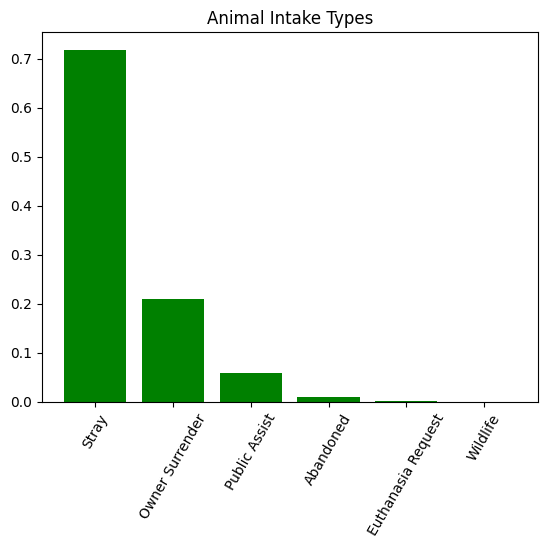

In [10]:
# visualize the breakdown of intakes
plt.bar(x=bd_intakes.index, height=bd_intakes.values, color='green')

plt.title('Animal Intake Types')
plt.xticks(rotation = 60)

plt.show();

In [11]:
# breakdown of outcomes
bd_outcomes = df['outcome_type'].value_counts(normalize=True)
bd_outcomes

outcome_type
Adoption           0.500747
Transfer           0.292626
Return to Owner    0.159558
Euthanasia         0.028883
Died               0.008477
Rto-Adopt          0.007551
Disposal           0.001551
Missing            0.000523
Relocate           0.000038
Stolen             0.000032
Lost               0.000013
Name: proportion, dtype: float64

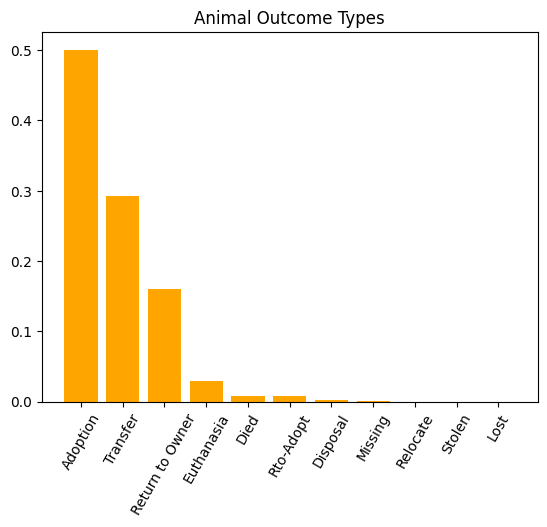

In [12]:
# visualize the breakdown of outcomes
plt.bar(x=bd_outcomes.index, height=bd_outcomes.values, color = 'orange')

plt.title('Animal Outcome Types')
plt.xticks(rotation = 60)

plt.show();

In [13]:
df.groupby(['outcome_type'])['outcome_gender'].value_counts(normalize=True)

outcome_type     outcome_gender
Adoption         Neutered Male     0.488355
                 Spayed Female     0.476488
                 Intact Female     0.018853
                 Intact Male       0.015998
                 Unknown           0.000306
Died             Intact Male       0.370482
                 Intact Female     0.306476
                 Unknown           0.150602
                 Neutered Male     0.087349
                 Spayed Female     0.085090
Disposal         Intact Male       0.325103
                 Unknown           0.288066
                 Intact Female     0.267490
                 Neutered Male     0.069959
                 Spayed Female     0.049383
Euthanasia       Intact Male       0.314254
                 Intact Female     0.260552
                 Neutered Male     0.200221
                 Spayed Female     0.125304
                 Unknown           0.099669
Lost             Intact Female     0.500000
                 Intact Male       0.500000


In [14]:
df['spay_neuter'].value_counts(normalize=True)

spay_neuter
0    0.568931
1    0.431069
Name: proportion, dtype: float64

In [15]:
df['outcome_age'].value_counts(normalize=True)

outcome_age
24.00     0.152020
12.00     0.151317
2.00      0.141264
36.00     0.057269
3.00      0.055143
1.00      0.045097
4.00      0.036141
48.00     0.034188
60.00     0.031666
5.00      0.025169
6.00      0.022634
72.00     0.020675
84.00     0.018294
96.00     0.017988
0.69      0.017790
0.46      0.017649
8.00      0.015900
10.00     0.014605
120.00    0.014470
0.23      0.013870
7.00      0.013417
0.92      0.012836
9.00      0.010436
108.00    0.009926
144.00    0.007130
11.00     0.006728
132.00    0.005560
156.00    0.004519
0.10      0.003498
168.00    0.003223
0.07      0.003128
0.03      0.002987
180.00    0.002860
0.13      0.002030
0.20      0.001940
0.00      0.001519
1.15      0.001232
0.17      0.001226
192.00    0.001219
204.00    0.000677
216.00    0.000383
228.00    0.000185
240.00    0.000140
264.00    0.000038
276.00    0.000006
288.00    0.000006
Name: proportion, dtype: float64

In [16]:
df['found_location'].value_counts()

found_location
Austin (TX)                               28894
Travis (TX)                                3387
Outside Jurisdiction                       1957
7201 Levander Loop in Austin (TX)          1449
Manor (TX)                                  733
                                          ...  
4201 Burch Drive in Travis (TX)               1
21506 Ann Showers Drive in Travis (TX)        1
3707 West Howard Lane in Austin (TX)          1
155 Edge Rock Dr in Austin (TX)               1
Austin Oaks in Austin (TX)                    1
Name: count, Length: 62699, dtype: int64

In [17]:
df['intake_condition'].value_counts(normalize=True)

intake_condition
Normal        0.861902
Injured       0.055654
Sick          0.036498
Nursing       0.024083
Neonatal      0.010634
Aged          0.003255
Medical       0.002828
Other         0.002100
Pregnant      0.000957
Feral         0.000894
Behavior      0.000466
Med Attn      0.000377
Unknown       0.000102
Med Urgent    0.000089
Neurologic    0.000064
Parvo         0.000038
Space         0.000026
Agonal        0.000019
Congenital    0.000006
Panleuk       0.000006
Name: proportion, dtype: float64

In [18]:
df['intake_age'].value_counts()

intake_age
24.00     23786
12.00     23216
1.00      17320
2.00       9909
36.00      8837
0.92       5710
48.00      5399
0.69       4955
60.00      4900
3.00       4570
4.00       4484
5.00       3747
0.46       3481
72.00      3251
6.00       2872
84.00      2844
0.23       2745
96.00      2701
7.00       2398
9.00       2337
120.00     2182
8.00       1861
108.00     1582
10.00      1312
0.00       1114
11.00      1082
144.00     1069
0.03        949
132.00      886
0.10        865
0.07        708
156.00      695
168.00      502
0.13        447
0.20        444
180.00      439
1.15        428
0.17        229
192.00      187
204.00      103
216.00       59
228.00       29
240.00       22
264.00        6
276.00        1
288.00        1
Name: count, dtype: int64

In [19]:
df[df['animal_type'] == 'Cat']['breed'].value_counts(normalize=True)

breed
Domestic Shorthair Mix                      0.507744
Domestic Shorthair                          0.324933
Domestic Medium Hair Mix                    0.050314
Domestic Medium Hair                        0.029112
Domestic Longhair Mix                       0.025172
                                              ...   
Turkish Angora                              0.000015
Ragdoll/Snowshoe                            0.000015
Balinese                                    0.000015
Japanese Bobtail/American Curl Shorthair    0.000015
Ocicat Mix                                  0.000015
Name: proportion, Length: 109, dtype: float64

In [20]:
df[df['animal_type'] == 'Dog']['breed'].value_counts(normalize=True)

breed
Pit Bull Mix                               0.107457
Labrador Retriever Mix                     0.093319
Chihuahua Shorthair Mix                    0.075178
German Shepherd Mix                        0.043450
Pit Bull                                   0.034220
                                             ...   
Anatol Shepherd/Saluki                     0.000011
Chinese Crested/Papillon                   0.000011
English Coonhound/Australian Cattle Dog    0.000011
Boxer/Harrier                              0.000011
Dachshund/Pomeranian                       0.000011
Name: proportion, Length: 2607, dtype: float64

In [21]:
df['color'].value_counts(normalize=True)

color
Black/White                 0.106444
Black                       0.084755
Brown Tabby                 0.064788
White                       0.035515
Brown/White                 0.033179
                              ...   
Cream Tabby/Orange Tabby    0.000006
Red Tick/Brown Brindle      0.000006
Tortie Point/Blue           0.000006
Blue Point/Cream            0.000006
Black Tabby/Gray Tabby      0.000006
Name: proportion, Length: 611, dtype: float64

In [22]:
df['stay_duration'].value_counts()

stay_duration
0      26291
4      14912
1       9383
3       9235
5       9219
       ...  
359        1
350        1
344        1
324        1
335        1
Name: count, Length: 366, dtype: int64

In [23]:
df['stay'].value_counts()

stay
1     139960
2      12830
3       2631
4        744
5        251
6        113
7         62
8         25
9         11
10         6
11         5
12         3
13         2
14         2
32         1
31         1
24         1
30         1
29         1
28         1
27         1
26         1
25         1
17         1
23         1
22         1
21         1
20         1
19         1
18         1
16         1
15         1
33         1
Name: count, dtype: int64

In [24]:
df['repeat'].value_counts()

repeat
0    127053
1     29611
Name: count, dtype: int64

### Visuals

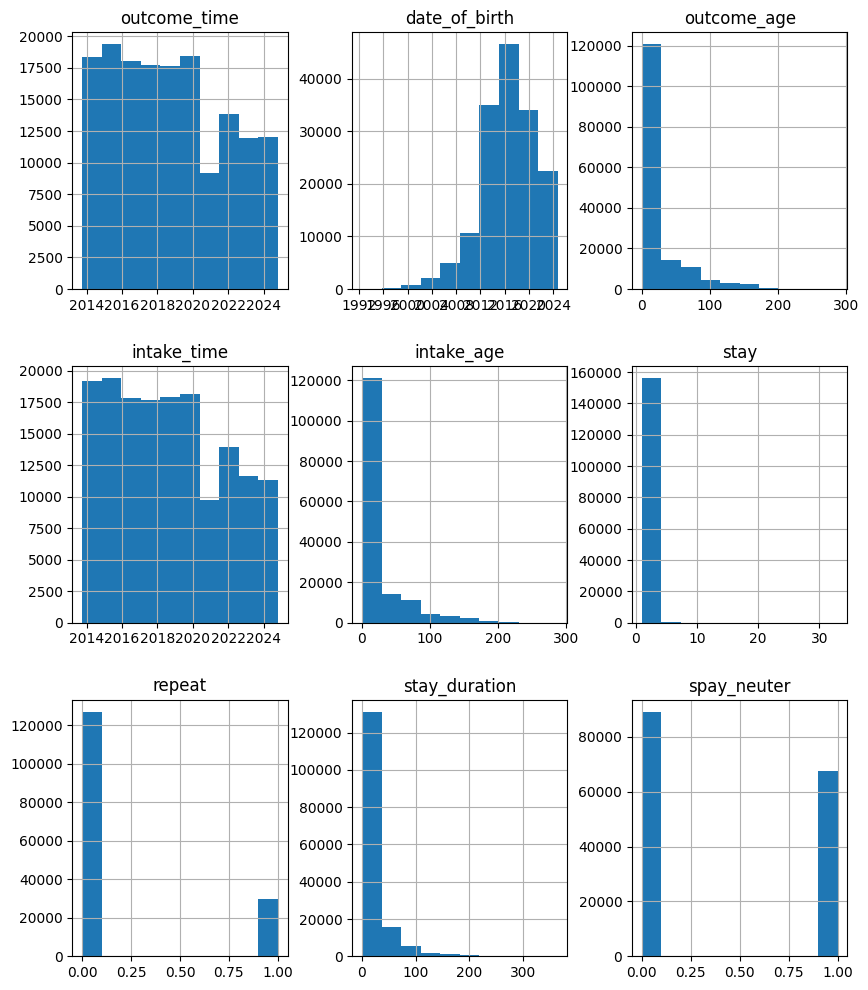

In [25]:
# quick check if any variables are normally distributed
df.hist(figsize=(10, 12));

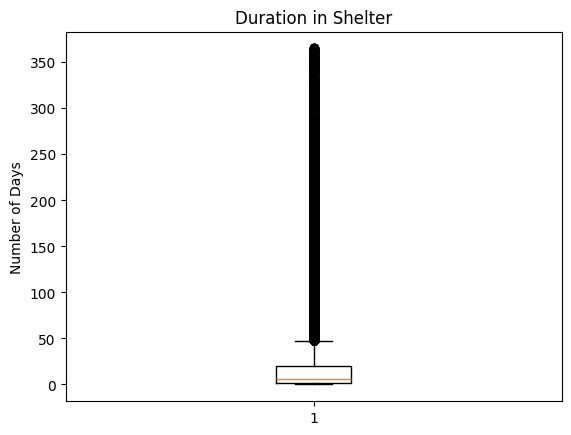

In [26]:
# checking stay duration for outliers

plt.boxplot(df['stay_duration'])
plt.title('Duration in Shelter')
plt.ylabel('Number of Days');

In [27]:
# check correlation matrix
df.corr(numeric_only=True)

,outcome_age,intake_age,stay,repeat,stay_duration,spay_neuter
outcome_age,1.000000,0.998809,0.107730,0.107172,0.022438,-0.294358
intake_age,0.998809,1.000000,0.107337,0.107376,0.004713,-0.300218
stay,0.107730,0.107337,1.000000,0.540634,0.014903,-0.199141
repeat,0.107172,0.107376,0.540634,1.000000,0.012847,-0.149212
stay_duration,0.022438,0.004713,0.014903,0.012847,1.000000,0.243358
spay_neuter,-0.294358,-0.300218,-0.199141,-0.149212,0.243358,1.000000


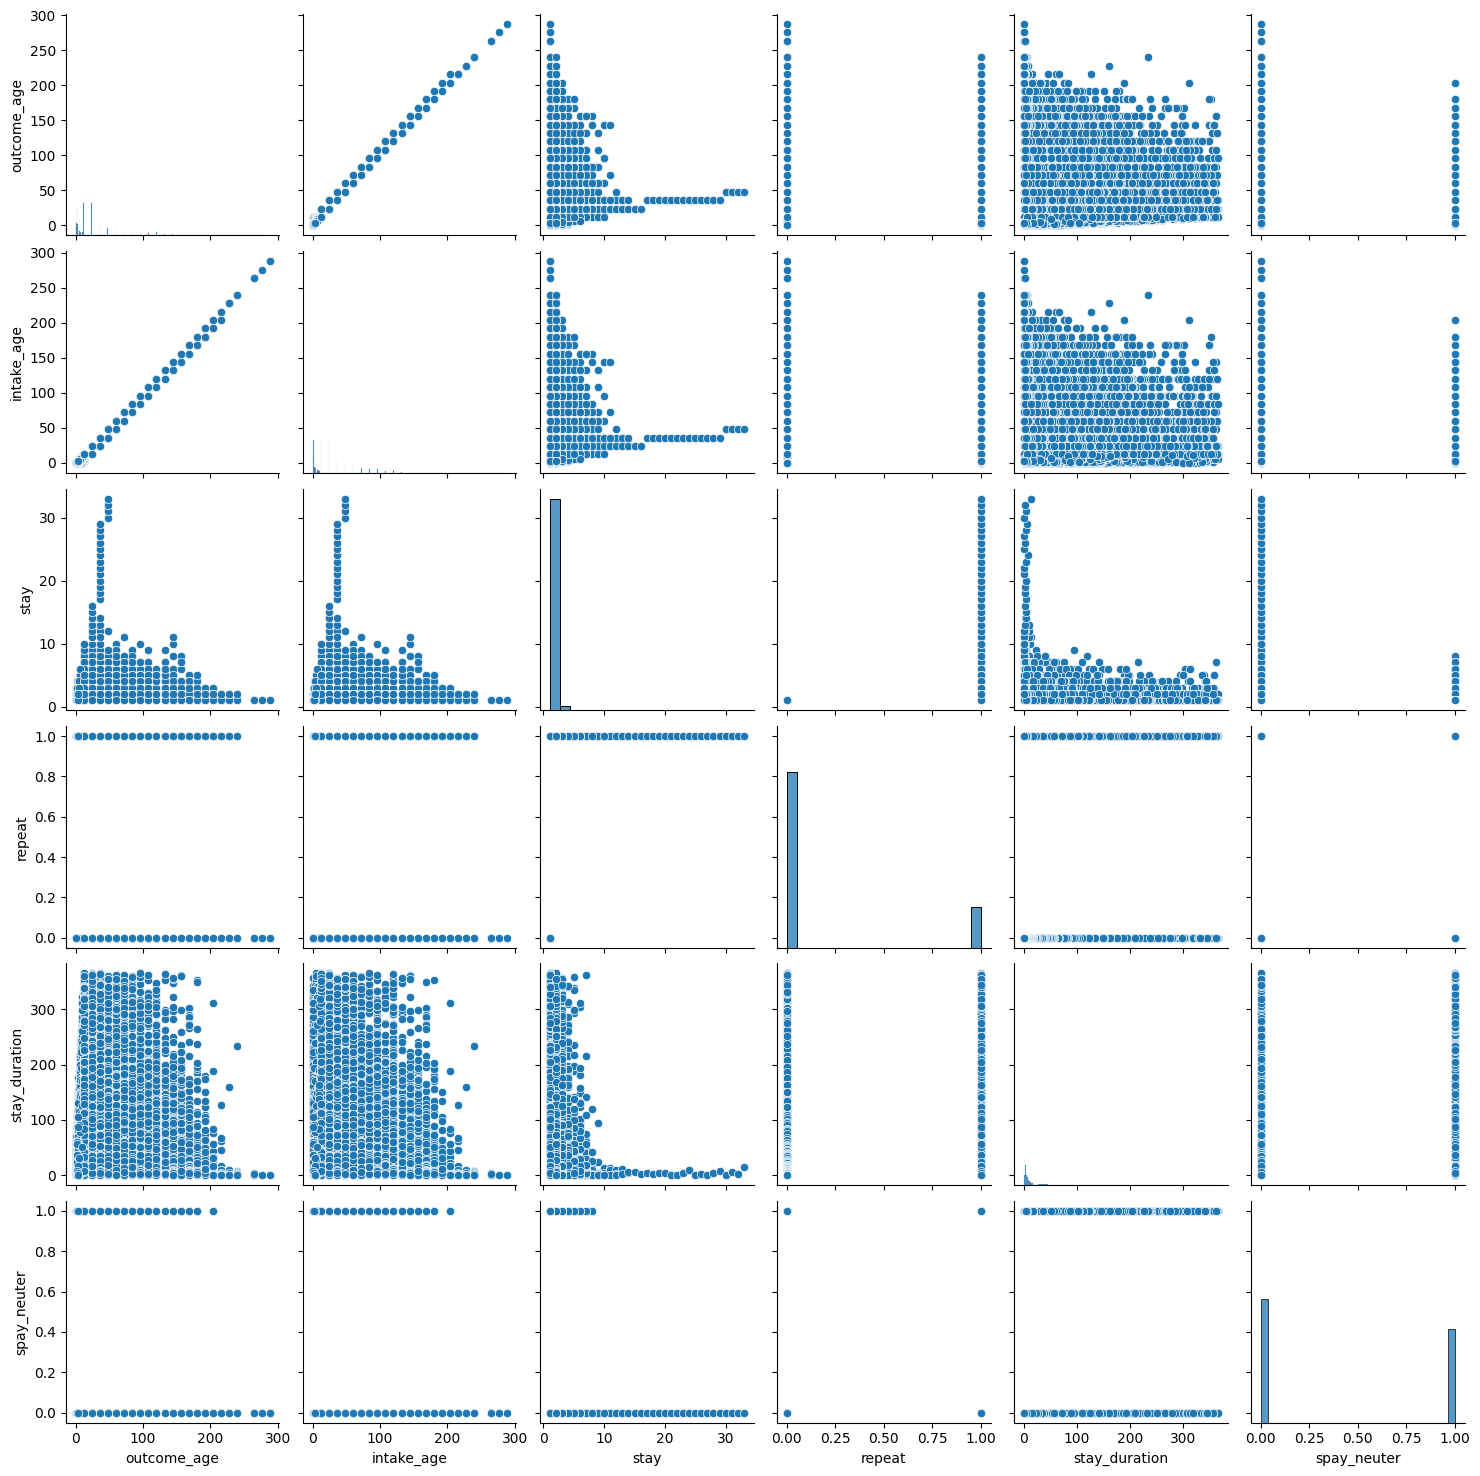

In [28]:
# checking pairplots as well
sns.pairplot(df);

##### Cats and Dogs
Aboout 90% of cats fall into one of five breeds that are mere descriptions of their hair.  There seems to be less importance made of a cats breed.  A theory is that cats are more individualistic and do not represent breed behaviors.

About 

As a result, do we see cats have better success rates than dogs?

In [29]:
# how many cat and dog breeds
cat_breeds = df[df['animal_type'] == 'Cat']['breed']
dog_breeds = df[df['animal_type'] == 'Dog']['breed']

print(f'There are {cat_breeds.nunique()} cat breeds and {dog_breeds.nunique()} dog breeds.')

There are 109 cat breeds and 2607 dog breeds.


In [31]:
# Looking at success rates for cats and dogs
success = df[(df['outcome_type'] == 'Adoption') | (df['outcome_type'] == 'Return to Owner') | (df['outcome_type'] == 'Rto-Adopt')]
cat_success = success[success['animal_type'] == 'Cat']
dog_success = success[success['animal_type'] == 'Dog']
total_cats = len(df[df['animal_type'] == 'Cat'])
total_dogs = len(df[df['animal_type'] == 'Dog'])

print(f'Cats have had {len(cat_success)} successful rehomings, {round(len(cat_success)/total_cats*100, 2)}% of all cats.')
print(f'Dogs have had {len(dog_success)} successful rehomings, {round(len(dog_success)/total_dogs*100,2)}% of all dogs.')

Cats have had 36468 successful rehomings, 55.27% of all cats.
Dogs have had 68161 successful rehomings, 75.17% of all dogs.


In [46]:
# top ten breeds for success
breeds_success = success.groupby('breed')['animal_id'].count().sort_values(ascending=False)
breeds_success.head(10)

breed
Domestic Shorthair Mix       16938
Domestic Shorthair           12939
Pit Bull Mix                  7278
Labrador Retriever Mix        6497
Chihuahua Shorthair Mix       4876
German Shepherd Mix           3132
Pit Bull                      2397
Domestic Medium Hair Mix      1803
Australian Cattle Dog Mix     1493
German Shepherd               1408
Name: animal_id, dtype: int64

##### Repeat Animals
Some animals return to the shelters.  What is different about these animals


In [51]:
breeds_repeat = df.groupby('breed')['repeat'].count().sort_values(ascending=False)
breeds_repeat

breed
Domestic Shorthair Mix                      33504
Domestic Shorthair                          21441
Pit Bull Mix                                 9744
Labrador Retriever Mix                       8462
Chihuahua Shorthair Mix                      6817
                                            ...  
Norfolk Terrier/Cardigan Welsh Corgi            1
Norfolk Terrier/Chihuahua Longhair              1
Dachshund Longhair/Australian Cattle Dog        1
Norfolk Terrier/Dachshund                       1
Yorkshire Terrier/Yorkshire Terrier             1
Name: repeat, Length: 2716, dtype: int64